# Dimension reduction and features extraction


## Introduction

In machine learning and statistics, dimensionality reduction or dimension reduction is the process of reducing the number of features under consideration, and can be divided into feature selection (not adressed here) and feature extraction.

Feature extraction starts from an initial set of measured data and builds derived values (features) intended to be informative and non-redundant, facilitating the subsequent learning and generalization steps, and in some cases leading to better human interpretations. Feature extraction is related to dimensionality reduction.

The input matrix $\mathbf{X}$ of dimension $(N \times p)$ is:
$$
\begin{pmatrix}
x_{1,1} & x_{1,2} & ... & x_{1,p} \\
x_{2,1} & x_{2,2} & ... & x_{2,p}\\
... & ... & ... & ...\\
x_{N,1} & x_{N,2} & ... & x_{N,p}
\end{pmatrix}
$$

Where the rows represent the samples and columns represent the variables.
Assume that $X$ is mean-centered, i.e., the estimated mean is subtracted from each column.

The goal is to learn a transformation that extract the few relevant features. This is generally done by exploiting the covariance $\Sigma_{XX}= E(\mathbf{X}-E(\mathbf{X}))^TE(\mathbf{X}-E(\mathbf{X}))$ between the input features.

## Singular Value Decomposition (SVD)

SVD is a method for transforming correlated variables into a set of uncorrelated ones that better expose the various relationships among the original data items. At the same time, SVD is a method for identifying and ordering the dimensions along which data points exhibit the most variation. Singular value decomposition is the key part of principal components analysis.

The SVD of the $(N × P)$ matrix $\mathbf{X}$ decomposes $\mathbf{X}$ into three simple transformations: $\mathbf{X} = \mathbf{U}\mathbf{D}\mathbf{V}^T$. Where

1. The **right-singular vectors** perfom an initial rotation using the principal component directions using the $K=\min(N, P)$. $\mathbf{V} = (\mathbf{v}_1, \mathbf{v}_2, \cdots , \mathbf{v}_K)$ is an $P \times K$ orthogonal matrix. $\mathbf{v}_j, j = 1, \cdots , K$, form an orthonormal basis for the space spanned by the row vectors of $\mathbf{X}$. They are the orthonormal eigenvectors of $mathbf{X}^T\mathbf{X}$. Each $\mathbf{v}_j$ is the linear combination of the variables that has maximum sample variance, subject to being uncorrelated with the previous $\mathbf{v}_{j-1}$.

2. The **singular values** scale the projection along the coordinate axes $d_1, d_2, \cdots , d_K$. Thus $\mathbf{D}$ is a $K \times K$ rectangular diagonal matrix made of the singular values of $\mathbf{X})$ with $d_1 \geq d_2 \geq \cdots \geq d_K \geq 0$. Singular values are the square roots of the eigenvalues of $\mathbf{X}^T\mathbf{X}$.

3. The **left-singular vectors** may be understood as the coordinates on the new orthogonal basis (obtained after the initial rotation). $\mathbf{U} = (\mathbf{u}_1, \mathbf{u}_2, \cdots , \mathbf{u}_K)$ is an $N \times K$ orthogonal matrix.  $\mathbf{u}_j, j = 1, \cdots , N$, form an orthonormal basis for the space spanned by the column vectors of $(\mathbf{X})$.

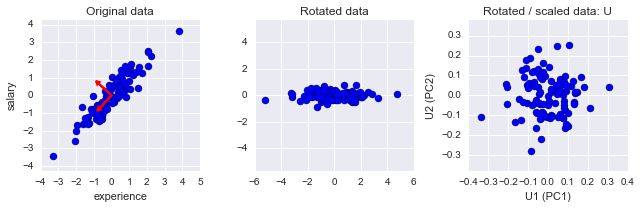

In [3]:
# dataset
n_samples = 100
experience = np.random.normal(size=n_samples)
salary = 1500 + experience + np.random.normal(size=n_samples, scale=.5)
X = np.column_stack([experience, salary])

# PCA using SVD
X -= X.mean(axis=0)  # Centering is required
U, s, Vh = scipy.linalg.svd(X, full_matrices=False)
explained_variance_ = (s ** 2) / n_samples
explained_variance_ratio_ = (explained_variance_ /
                             explained_variance_.sum())
Xproj = np.dot(X, Vh.T)

# U : Unitary matrix having left singular vectors as columns.
#     Of shape (n_samples,n_samples) or (n_samples,n_comps), depending on
#     full_matrices.
#
# s : The singular values, sorted in non-increasing order. Of shape (n_comps,), 
#     with n_comps = min(n_samples, n_features).
#
# Vh: Unitary matrix having right singular vectors as rows. 
#     Of shape (n_features, n_features) or (n_comps, n_features) depending on full_matrices.


plt.figure(figsize=(9, 3)) 

#fig, axes = plt.subplots(1, 3)#, figsize=(3, 10)) 
plt.subplot(131)

plt.scatter(X[:, 0], X[:, 1], s=50)
for i in range(Vh.shape[0]):
    plt.arrow(x=0, y=0, dx=Vh[i, 0], dy=Vh[i, 1], head_width=0.2, 
              head_length=0.2, linewidth=2, fc='r', ec='r')
plt.axis('equal')
plt.ylim(-4, 4)

plt.title("Original data")
plt.xlabel("experience")
plt.ylabel("salary")

plt.subplot(132)
plt.scatter(Xproj[:, 0], Xproj[:, 1], s=50)
plt.axis('equal')
plt.title("Rotated data")

plt.subplot(133)
assert np.allclose(Xproj / s,  U)
plt.scatter(U[:, 0], U[:, 1], s=50)
plt.axis('equal')
plt.title("Rotated / scaled data: U")
plt.xlabel("U1 (PC1)")
plt.ylabel("U2 (PC2)")

plt.tight_layout()

## Principal Components Analysis (PCA)

Principal components analysis is the main method used for linear dimension reduction. The idea of principal component analysis is to find the directions that capture the variation in the data as much as possible.

PCA can be thought of as fitting an n-dimensional ellipsoid to the data, where each axis of the ellipsoid represents a principal component. If some axis of the ellipse is small, then the variance along that axis is also small, and by omitting that axis and its corresponding principal component from our representation of the dataset, we lose only a commensurately small amount of information.

To find the axes of the ellipse, we must first subtract the mean of each variable from the dataset to center the data around the origin. Then, we compute the covariance matrix of the data, and calculate the eigenvalues and corresponding eigenvectors of this covariance matrix. Then, we must orthogonalize the set of eigenvectors, and normalize each to become unit vectors. Once this is done, each of the mutually orthogonal, unit eigenvectors can be interpreted as an axis of the ellipsoid fitted to the data. The proportion of the variance that each eigenvector represents can be calculated by dividing the eigenvalue corresponding to that eigenvector by the sum of all eigenvalues.

The sample covariance matrix of $X$ with centered columns is given as:
$$
\Sigma_{XX}= \frac{\mathbf{X}^T\mathbf{X}}{N}
$$

If you do the Eigen decomposition of $X^TX$:

\begin{align*}
\mathbf{X}^T\mathbf{X}
 &= (\mathbf{U}\mathbf{D}\mathbf{V}^T)^T(\mathbf{U}\mathbf{D}\mathbf{V}^T)\\
 &= \mathbf{V}\mathbf{D}^T\mathbf{U}^T\mathbf{U}\mathbf{D}\mathbf{V}^T\\
 &=\mathbf{V}\mathbf{D}^2\mathbf{V}^T
\end{align*}


It turns out that if you have done the singular value decomposition then you already have the Eigen value decomposition for $\mathbf{X}^T\mathbf{X}$. Indeed the right singular vectors $U$ of $X$ are equivalent to the eigenvectors of $X^TX$, while the singular values $d_k$ of $X$ are equal to the square roots of the eigenvalues $\lambda_k$ of $X^TX$. Moreover computing PCA with SVD do not require to form the matrix $X^TX$, so computing the SVD is now the standard way to calculate a principal components analysis from a data matrix, unless only a handful of components are required.

The eigenvectors of $X^TX$, $v_j$ are called **principal component directions** of $X$. If you project $X$ onto the principal components directions you get the **principal components**.

It's easy to see that $\mathbf{z}_j = \mathbf{X}\mathbf{v}_j = \mathbf{u}_j d_j$. Hence $\mathbf{u}_j$ is simply the projection of the row vectors of $\mathbf{X}$, i.e., the input predictor vectors, on the direction $\mathbf{v}_j$, scaled by $d_j$. For example:

$$
    \mathbf{z}_1=\begin{pmatrix}
    X_{1,1}v_{1,1}+X_{1,2}v_{1,2}+ ... +X_{1,p}v_{1,p}\\
    X_{2,1}v_{1,1}+X_{2,2}v_{1,2}+ ... +X_{2,p}v_{1,p}\\
    \vdots\\
    X_{N,1}v_{1,1}+X_{N,2}v_{1,2}+ ... +X_{N,p}v_{1,p}\end{pmatrix}
$$

The principal components of $\mathbf{X}$ are $\mathbf{z}_j = d_j \mathbf{u}_j , j = 1, ... , p$.
The first principal component of $\mathbf{X}$, $\mathbf{z}_1$ , has the largest sample variance amongst all normalized linear comninations of the coulmns of  $\mathbf{X}$.
$Var(\mathbf{z}_1)=d_{1}^{2}/N$ Subsequent principal components $\mathbf{z}_j$ have maximum variance  $d^2_j / N$, subject to being orthogonal to the earlier ones.

In [4]:
import numpy as np
from sklearn.decomposition import PCA

X = np.column_stack([experience, salary])
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_)
assert np.all(Xproj == pca.transform(X))

[ 0.96321956  0.03678044]
